# NGC Machine Learning
 


Nama : Maulana Achsan 
Batch : RMT 

Tugas ini untuk menambah skill tentang ML dan Linear regression dengan data set yang diberikan mengenai asuransi dan faktor faktor yang menambah biaya asuransi perbulan


In [167]:
# Importing libraries yang dibutuhkan 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

## Smart Problem Statement 

### Specific 
Membuat model machine learning yang bisa memprediksi charge/iuran asuransi per bulan. 

### Measurement 
Model dianggap berhasil ketika MAE mendekati angka 0 

### Achievable
Bermodalkan dataset yang sudah kita punya maka kita bisa membuat model machine learning berdasarkan dataset ini, didukung dengan team data kita yang siap untuk melakukan analisis serta pembuatan model tersebut

### Relevant
Pembuatan model memang harus presisi untuk memastikan prediksi iuran asuransi.Model itu akan kita deploy dalam website kita sehingga orang yang akan mengikuti program asuransi kita bisa membuat perkiraan sendiri di rumah tanpa harus menghubungi kita atau datang ke kantor kita. Namun ketika orang itu sudah datang ke kantor atau melakukan kontak kepada kita maka akan ada faktor faktor khusus yang membuat harga asuransi bisa naik dan turun tergantung kebutuhan pada setiap kasus. 


### Time Bound
Pengerjaan ini akan dilakukan dalam waktu 3 bulan.

### Problem Statement 

Membuat Model machine learning untuk memprediksi charge asuransi per bulan dengan ukuran MAE mendekati 0 didukung oleh kepemilikan team data dan dataset, model ini akan kita buat untuk kemudahan customer dan pegawai kita. Customer bisa memberi perkiraan berapa harga yang akan dia bayar per bulan tanpa harus contact kita atau datang ke kantor kita. pegawai kita bisa fokus ke hal lain selain memperkirakan harga asuransi dan menemui pelanggan. Pengerjaan ini akan dilakukan dalam waktu 3 bulan. 

## Data Loading

In [168]:
df = pd.read_csv(r"C:\Users\asanm\Hacktiv8\fase2\W1\Senin\lat_sendiri_senin\insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1081,32,male,27.835,1,no,northwest,4454.40265
813,28,male,22.515,2,no,northeast,4428.88785
1030,46,female,23.655,1,yes,northwest,21677.28345
861,38,female,28.000,3,no,southwest,7151.09200
1257,54,female,27.645,1,no,northwest,11305.93455
784,31,female,29.260,1,no,southeast,4350.51440
1112,48,female,25.850,3,yes,southeast,24180.93350
218,26,female,29.920,1,no,southeast,3392.97680
537,46,female,30.200,2,no,southwest,8825.08600
694,27,female,34.800,1,no,southwest,3577.99900


Dari data ini terlihat berisi 7 kolom dan berisi kolom contoh seperti umur kelamin dan BMI (body mass index). Dari sample ini cukup bersih dan tidak ada duplikasi sepertinya namun perlu di gali lebih dalam karena hanya sampel dari 10 data. Belum mereferensikan seluruh data

In [169]:
# pembuatan copy untuk memastikan data mempunyai duplikatnya
df2 = df.copy()

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data terdiri dari 7 kolom dan 4 type data numerik dan type data kategorik. dilihat dari data type nya seperti nya sudah okay semua. Ambil contoh untuk age sudah berada pada datatype integer dan sex pada datatype object. 

In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Pada kolom usia memiliki rata-rata 39 tahun dan deviasi 19 namun range nya sekitar 46. Asuransi hanya bisa diambil oleh orang-orang yang memiliki usia 18 tahun ke atas. terlihat di data minimum.  
pada kolom bmi rata-rata 30 dan std 6 dekat dengan titik tengah (median) sekitar 30 berarti kemungkinan ini normal dan 68% data terpusat di titik 30 +- std. 
rata rata customer memiliki anak 1 
untuk kolom charges range nya yaitu 62 ribuan dan rata2 itu 13200 an namun ini kita tidak diberi tahu apakah ini range per tahun apa per month. kita asumsikan disini per bulan saja. 

## Exploratory data analysis 

Membuat rumus untuk melihat bentuk datanya kira kira seperti apa sehingga kita bisa tau gambaran data semua secara sekilas. Ini cenderung memakai boxplot bisa pakai histogram dsb

In [172]:
def plot_all_boxplots(df):
    """
    Membuat boxplot untuk setiap kolom numerik dalam DataFrame."""
    # Pilih hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Tentukan ukuran figure
    plt.figure(figsize=(5, 5))
    
    # Loop melalui setiap kolom numerik dan buat boxplot
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1,len(numeric_cols), i)
        plt.boxplot(df[col].dropna(), vert=True)
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    
    # Sesuaikan layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Tampilkan plot
    plt.show()

# Contoh penggunaan:
# df = pd.read_csv('your_data.csv')
# plot_all_boxplots(df)


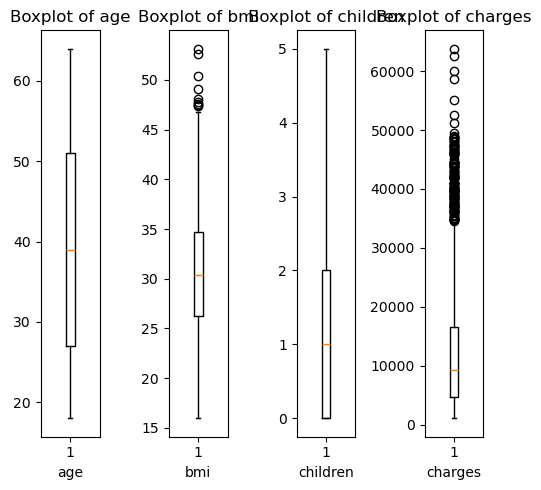

In [173]:
plot_all_boxplots(df)

Untuk data age dan children tidak ada outliernya. namun pada data bmi dan charges masih terdapat outlier yang mana penentuan untuk handling atau tidak harus kita lihat nanti. 
terlihat juga pada charges itu menghitam bulatannyha itu menandakan data banyak sekali outlier di titik2 itu 

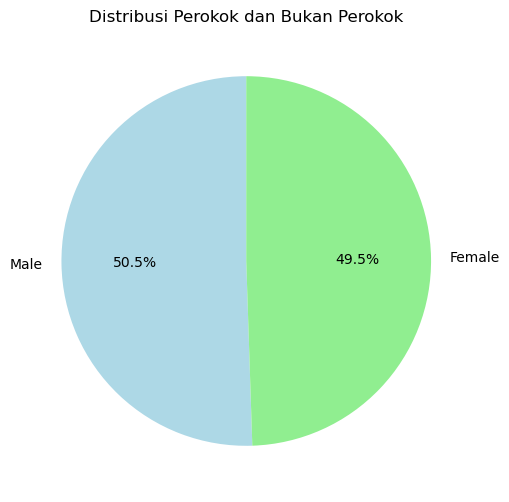

In [174]:
jumlah_cowok= len(df[df['sex']=='male'])
jumlah_cewek= len(df[df['sex']=='female'])

# Data untuk pie chart
labels = ['Male', 'Female']
values = [jumlah_cowok, jumlah_cewek]
colors = ['lightblue', 'lightgreen']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Menambahkan judul
plt.title('Distribusi Perokok dan Bukan Perokok')

# Menampilkan plot
plt.show()

Data terbagi 2 hampir sama besar antara jumlah konsumen asuransi cowok dan cewek. Jadi kita ke depannya masih bisa menyeimbangkan kecenderungan produk kita untuk kedua jenis kelamin ini, tanpa harus condong ke salah satu jenis kelamin. 

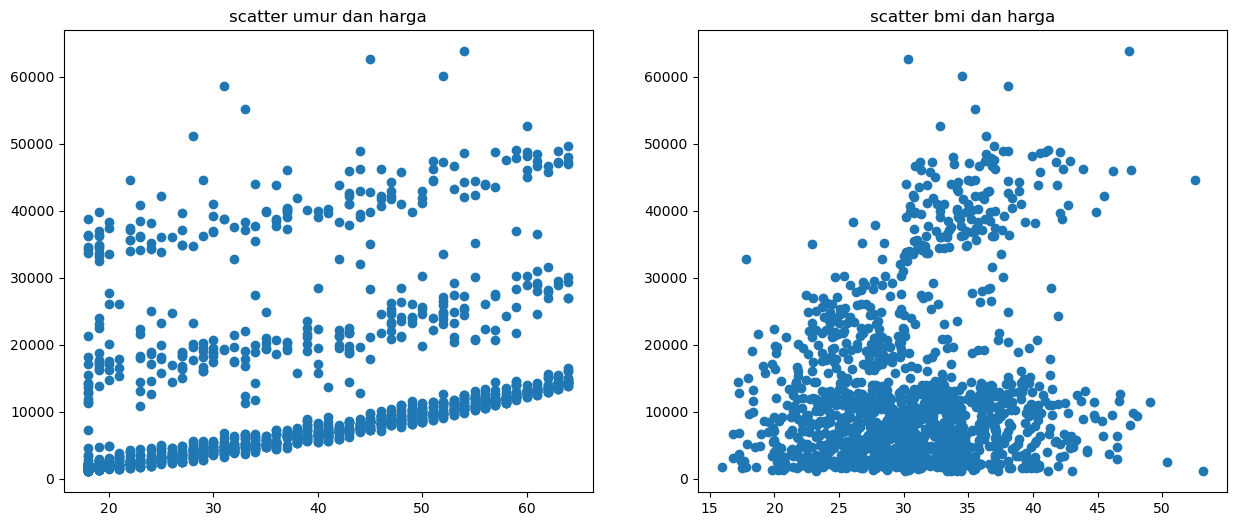

In [175]:
plt.figure (figsize= (15,6))
plt.subplot(1,2,1)
plt.scatter (x= df['age'], y= df['charges'])
plt.title ('scatter umur dan harga')


plt.subplot(1,2,2)
plt.scatter(x= df['bmi'], y = df['charges'])
plt.title ('scatter bmi dan harga')

plt.show()

ada kecenderungan korelasi postif pada haraga dan umur. semakin umur tinggi maka harga juga akan naik. ini seperti resiko terjadinya penyakit. semakin tua seseorang maka kemungkinan orang tersebut mendapatkan penyakit semakin tinggi. Namun korelasi ini terbagi menjadi 3 bagian yaitu bagian ke 1 bagian ke 2 dan bagian ke 3 jika kita tarik garis regresinya. jadi data ini menunjukkan ada perbedaan harga asuransi pada umur tinggi dan rendah. Namun korelasinya masih terbagi lagi menjadi 3. 

pada scatter bmi dan harga ini menunjukkan randomnya data, data ini cenderung tidak berkorelasi antara bmi dan harga. meskipun ada indikasi positif namun titik dibawah cenderung banyak. 

### Menjawab Soal 

1. Overweight kelas 1 30<= BMI < 35
2. Overweight kelas 2 35<= BMI < 40 
3. Overweight kelas 3 BMI >= 40 
4. Tidak OW  BMI <30

In [176]:
# Eda Non 


OW1 = df[(df['bmi'] < 35 ) & (df['bmi'] >= 30 )]   
print('jumlah ow 1 ' ,len(OW1))

OW2 = df[(df['bmi'] < 40 ) & (df['bmi'] >= 35 )]   
print('jumlah ow 2 ' ,len(OW2))

OW3 = df[(df['bmi'] >= 40 )]   
print('jumlah ow 3 ' ,len(OW3))

NON_OW = df [df['bmi']< 30]

print('non overweight ', len(NON_OW))

jumlah ow 1  391
jumlah ow 2  225
jumlah ow 3  91
non overweight  631


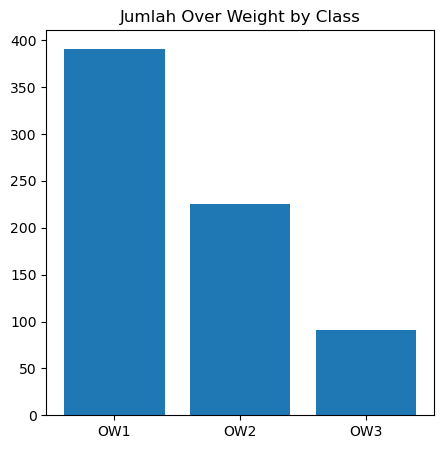

In [177]:
namaX= ['OW1','OW2','OW3']
namaY = [len(OW1),len(OW2),len(OW3) ]

plt.figure (figsize=(5,5))
plt.bar(x=namaX, height= namaY)
plt.title('Jumlah Over Weight by Class')

plt.show()

Data overweight per class menunjukkan bahwa OW 1 berada di angka terbanyak yaitu ketika BMI 30 sampai 35 disusul oleh OW kelas 2 dan OW kelas 3. perlu diketahui orang orang over weight ini merupakan orang2 yang ada ancaman terhadap kesehatannya terutama penyakit metabolik. meskipun faktor lain masih ada yang mendukung namun ini adalah salah satu skala yang biasanya dipakai orang untuk menentukan apakah mereka baik secara kesehatan atau tidak. dalam konteks asuransi ya. 

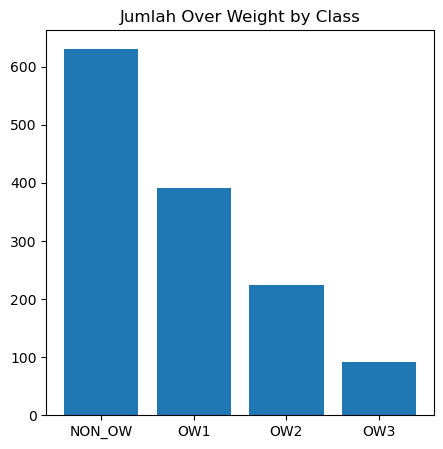

In [178]:
namaX= ['NON_OW','OW1','OW2','OW3']
namaY = [len(NON_OW),len(OW1),len(OW2),len(OW3) ]
persentase = []

plt.figure (figsize=(5,5))
plt.bar(x=namaX, height= namaY)
plt.title('Jumlah Over Weight by Class')
plt.show()

Untuk memperjelas kita lihat jumlah perbandingan antara OW dan normal pada data. Normal terlihat mendominasi jauh dibandingkan Overweight. Ini perlu kita lihat lagi secara persentase 

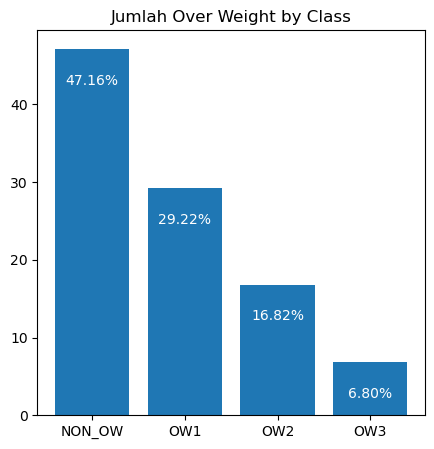

In [179]:
namaX= ['NON_OW','OW1','OW2','OW3']
namaY = [len(NON_OW),len(OW1),len(OW2),len(OW3) ]
total= sum(namaY)
persentase =[(jumlah / total) * 100 for jumlah in namaY]

plt.figure (figsize=(5,5))
bars = plt.bar(x=namaX, height=persentase)
plt.title('Jumlah Over Weight by Class')
for bar, percentage in zip(bars, persentase):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f'{percentage:.2f}%', ha='center', va='bottom', color='white')
plt.show()


47% pelanggan asuransi kita merupakan orang yang memiliki badan normal. Dan disusul oleh OW 1, dan seterusnya hingga OW kelas 3. Kita akan melihat hubungan antara kelas ow ini per kelas untuk menentukan apakah kelas ini memiliki korelasi dengan harga 

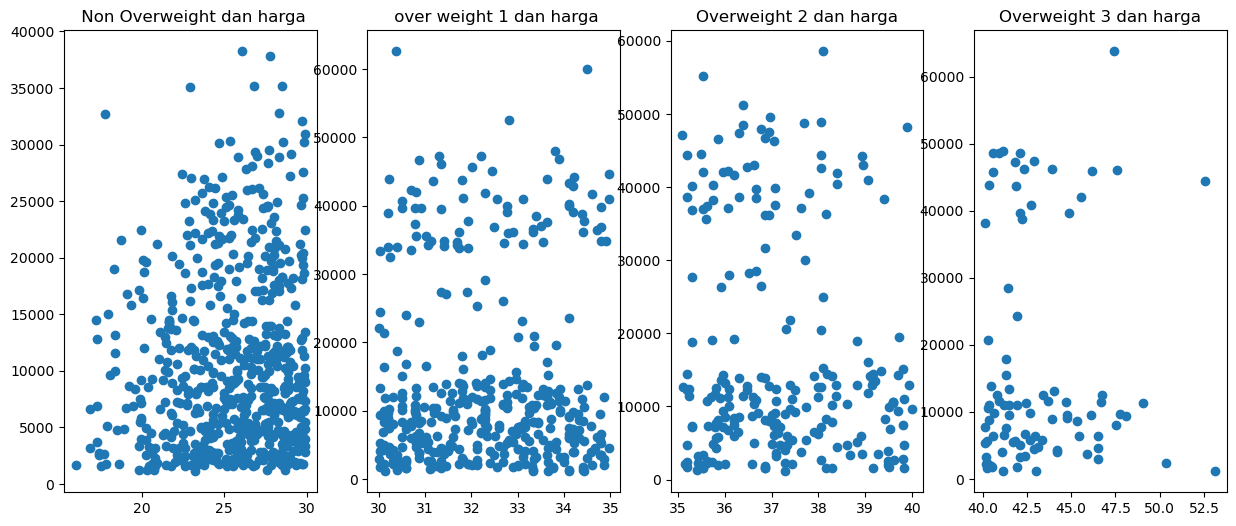

In [180]:
plt.figure(figsize= (15,6))

plt.subplot (1,4,1)
plt.scatter (x= NON_OW['bmi'], y= NON_OW['charges'])
plt.title (' Non Overweight dan harga')

plt.subplot (1,4,2)
plt.scatter (x= OW1['bmi'], y= OW1['charges'])
plt.title (' over weight 1 dan harga')

plt.subplot (1,4,3)
plt.scatter (x= OW2['bmi'], y= OW2['charges'])
plt.title ('Overweight 2 dan harga')

plt.subplot (1,4,4)
plt.scatter (x= OW3['bmi'], y= OW3['charges'])
plt.title ('Overweight 3 dan harga')

plt.show()

tidak ada korelasi positif antara harga dan kelas weight pada kelas yang telah kita tentukan. Kita beri contoh pada harga 2000 maka setiap data menunjukkan ada saja orang yang terkena charge 2000 perbulan untuk biaya iuran asuransinya. 

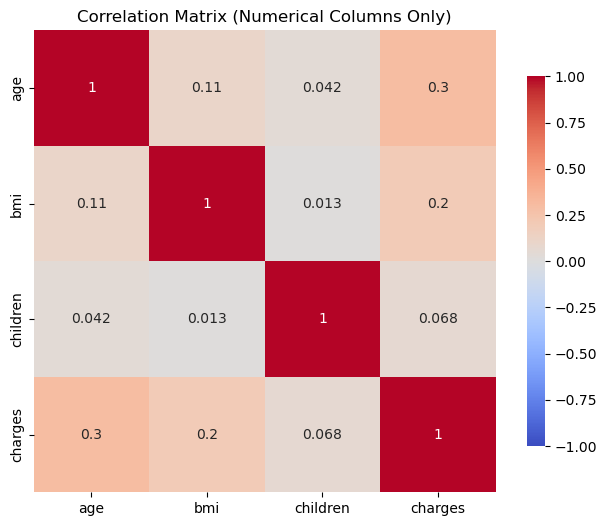

In [181]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi pada kolom yang bertipe numerik
correlation_matrix = numeric_df.corr()

# Buat diagram korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

Tidak ada korelasi tinggi antara age bmi dan children terhadap iuran per bulan. Untuk contoh kita lihat baris charges. Kita pertemukan baris charges dengan kolom children. maka kita ketemu korelasi antara kepemilikan anak dan charges adalah 6% angka ini sangat kecil dan bisa diabaikan dalam konteks korelasi. Karena tidak menggambarkan korelasi yang tinggi. Korelasi yang tinggi adalakh korelasi yang mempunyai angka 0,5 ke atas. angka korelasi itu 1 sampai -1. Jika korelasi di atas 0,5 atau dibawah -0,5 maka korelasi itu moderat kuat. 

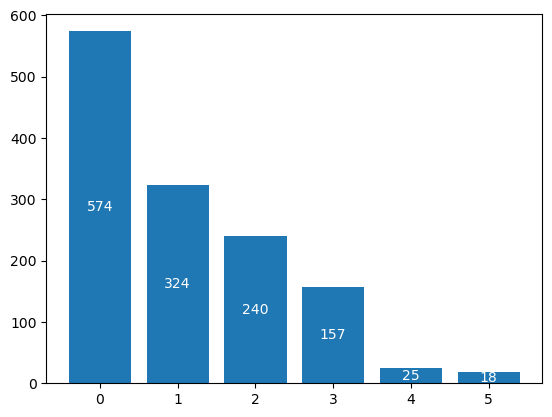

In [182]:
jumlah_anak= df['children'].value_counts()

bars = plt.bar(x= jumlah_anak.index , height=jumlah_anak.values)
for bar in bars:
    yval = bar.get_height()  # Mendapatkan tinggi setiap batang
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'{yval}', ha='center', va='center', color='white')  # Menempatkan teks di tengah bar

plt.show()



In [183]:
sort_anak = sorted(df['children'].unique())

mayoritas pelanggan kita adalah customer dengan tidak memiliki anak

rata rata charge untuk pelanggan yang memiliki anak 0 adalah 12365.97560163589
rata rata charge untuk pelanggan yang memiliki anak 1 adalah 12731.171831635802
rata rata charge untuk pelanggan yang memiliki anak 2 adalah 15073.563733958332
rata rata charge untuk pelanggan yang memiliki anak 3 adalah 15355.318366815285
rata rata charge untuk pelanggan yang memiliki anak 4 adalah 13850.6563112
rata rata charge untuk pelanggan yang memiliki anak 5 adalah 8786.035247222222


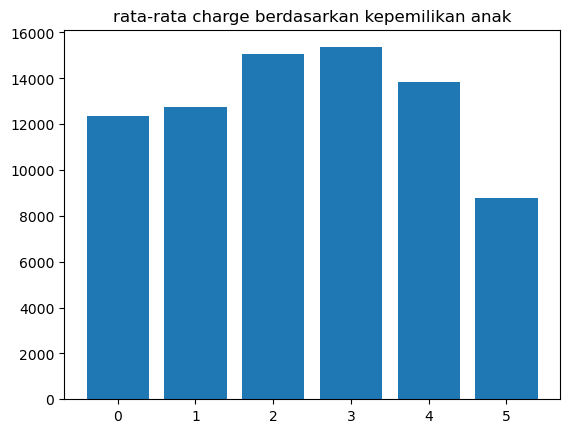

In [184]:
list_rata_anak =[]
for i in sort_anak : 
    rata_charge = df[df['children']== i]['charges'].mean()
    print(f'rata rata charge untuk pelanggan yang memiliki anak {i} adalah {rata_charge}')
    list_rata_anak.append(rata_charge)

plt.bar(x = sort_anak, height=list_rata_anak)
plt.title('rata-rata charge berdasarkan kepemilikan anak')
plt.show()

memang terlihat ada kenaikan charge ketika kita bandingkan kepemilikan anak 3 dan tidak mempunyai anak. namun data ini menjadi tidak relevan ketika kepemilikan anak itu 4 malah turun dan kepemilikan anak 5 malah terlihat lebih turun lagi. jadi kepemilikan anak tidak bisa menjadi patokan apakah asuransi kita akan semakin mahal atau tidak. 

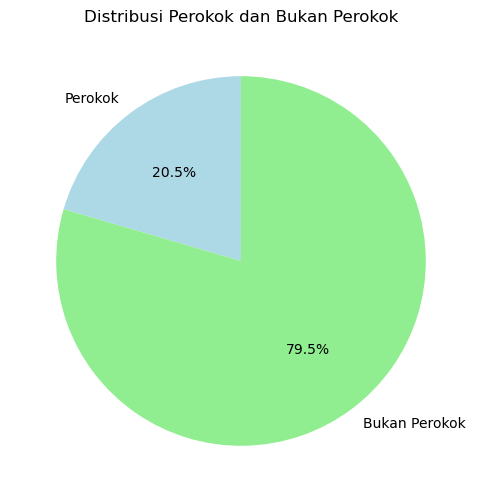

In [185]:
jumlah_perokok = len(df[df["smoker"] == "yes"])
jumlah_non_perokok = len(df[df["smoker"] == "no"])

# Data untuk pie chart
labels = ['Perokok', 'Bukan Perokok']
values = [jumlah_perokok, jumlah_non_perokok]
colors = ['lightblue', 'lightgreen']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Menambahkan judul
plt.title('Distribusi Perokok dan Bukan Perokok')

# Menampilkan plot
plt.show()


jumlah konsumen kita banyak yang perokok. 80% konsumen kita merupakan perokok. namun kita harus mengetahui apakah rata2 charge untuk perokok dan bukan perokok berbeda ? 

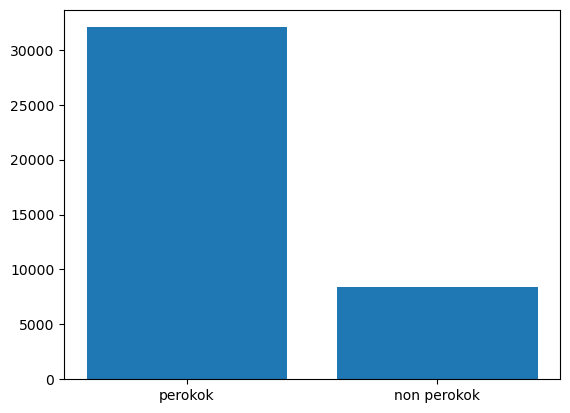

In [186]:
rata_perokok= df[df["smoker"] == "yes"]['charges'].mean()
rata_non_perokok = df[df["smoker"] == "no"]['charges'].mean()

plt.bar (x=['perokok','non perokok'], height= [rata_perokok,rata_non_perokok])
plt.show()

Terlihat orang orang yang merokok mempunyai rata-rata charge asuransi yang jauh lebih tinggi. perbedaan 20.000 dolar menujukkan angka yang tinggi untuk perbeddaan asuransinya. hal ini senada dengan temuan saya pada website penyedia asuransi di amerika. https://parinsurance.com/how-smoking-affects-your-health-insurance-premiums/ disini dijelaskan ternyata memang perokok itu ada kelas-kelasnya dan bisa kita simpulkan bahwa ketika kita tidak merokok maka asuransi kita bisa lebih rendah charge nya. 

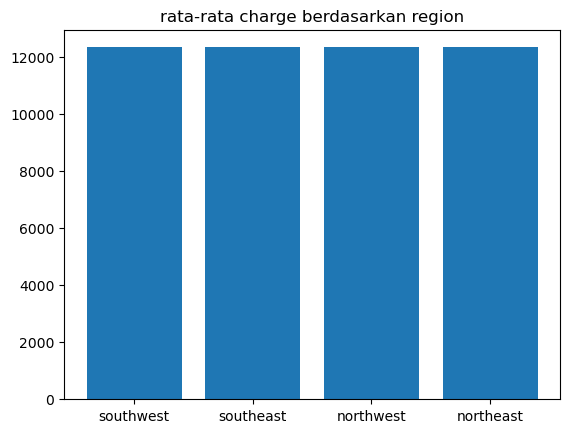

In [187]:
list_region = df['region'].unique()
rata_region = []

for i in list_region : 
    rata_region_ini= df[df['region']== list_region[0]]['charges'].mean() 
    rata_region.append(rata_region_ini)

plt.bar(x = list_region, height=rata_region)
plt.title('rata-rata charge berdasarkan region')
plt.show()

Meskipun pada website https://parinsurance.com/how-smoking-affects-your-health-insurance-premiums/ menunjukkan bahwa region di USA bisa menjadi faktor charge asuransi.  namun kenyataannya dalam data ini faktor region tidak menunjukkan perbedaan charges asuransi. karena rata-rata charge asuransi pada setiap region menunjukkan angka yang sama. Karena data benar benar sama maka kita bisa drop data ini pada feature engineering. 

## Feature Engineering 

Kita telah selesai melakukan EDA dan ada beberapa kesimpulan seperti OW 1 lebih banyak dibandingkan kelas OW lainnya. ada korelasi antara harga dan umur. Umur terlihat sudah terdistribusi normal. Bmi dan harga sepertinya tidak berkorelasi berdasarkan scatter plot. 

disini kita akan menentukan feature feature mana yang akan kita pakai dan fiture mana yang akan kita tidak pakai dan bisa kita drop. 

kita akan menggunakan target yaitu price yang mana ( model akan menentukan berapa harga asuransi nya ketika seseorang datang ke kantor asuransi dan memberikan fitur fitur maka model akan bisa memprediksi berapa harga asuransi berdasarkan model yang telah kita lati ) 

### Split antara target dan fitur 


In [188]:
#splitting antara train dan 
X= df.drop(['charges'], axis = 1 )
y = df['charges']

In [189]:
# split antara test dan training data 
# penggunaan test size 20% 
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state = 15)

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1070, 6)
Test Size (268, 6)


In [190]:
X_train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [191]:
X_test.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [192]:
X_test.duplicated().sum()

0

In [193]:
# Get numeric and categorical column 
#numeric
num_columns = X_train.select_dtypes(include= np.number).columns.tolist()
#categoric
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print(f' numerik kolom {num_columns}')
print(f' kolom kategori {cat_columns}')

 numerik kolom ['age', 'bmi', 'children']
 kolom kategori ['sex', 'smoker', 'region']


In [194]:
# pemisahan antara kategori dan non kategori
X_train_num = X_train[num_columns]
X_test_num  = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat  = X_test[cat_columns]

### Feature Selection 

In [195]:
X_train

,age,sex,bmi,children,smoker,region
1256,51,female,36.385,3,no,northwest
147,51,female,37.730,1,no,southeast
1042,20,male,30.685,0,yes,northeast
889,57,male,33.630,1,no,northwest
650,49,female,42.680,2,no,southeast
...,...,...,...,...,...,...
1223,20,female,24.420,0,yes,southeast
667,40,female,32.775,2,yes,northwest
156,48,male,24.420,0,yes,southeast
384,44,male,22.135,2,no,northeast


In [196]:
# cek value unik dari region
X_train['region'].unique()

array(['northwest', 'southeast', 'northeast', 'southwest'], dtype=object)

Menurut saya masih ada feature yang seharusnya tidak dipakai. yaitu region dan sex. karena region hanya menunjukkan tempat dia tinggal tidak ada hubungan atau dukurngan terhadap harga. karena ini berdasarkan asumsi maka perlu dicek lebih lanjut apakah benar lokasi dari suatu asuransi itu bisa mempengaruhi harga. 
berdasarkan data dari website ini  https://www.forbes.com/advisor/health-insurance/how-much-does-health-insurance-cost/  ternyata perbedaan dari tempat mempengaruhi harga asuransi. karena kecupuan saya 
sya cenderung tidak memakai ini dan akan di drop

In [197]:
X_train_cat.drop(['sex','region'], axis = 1 , inplace = True)
X_test_cat.drop(['sex','region'], axis = 1, inplace= True) 
X_train_cat

C:\Users\asanm\AppData\Local\Temp\ipykernel_4988\2881030119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop(['sex','region'], axis = 1 , inplace = True)
C:\Users\asanm\AppData\Local\Temp\ipykernel_4988\2881030119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop(['sex','region'], axis = 1, inplace= True)


,smoker
1256,no
147,no
1042,yes
889,no
650,no
...,...
1223,yes
667,yes
156,yes
384,no


In [198]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.7173913 , 0.54950229, 0.6       ],
       [0.7173913 , 0.58568738, 0.2       ],
       [0.04347826, 0.39615281, 0.        ],
       ...,
       [0.65217391, 0.22760291, 0.        ],
       [0.56521739, 0.1661286 , 0.4       ],
       [0.65217391, 0.39870864, 0.6       ]])

In [199]:
X_train_cat.sample(10)

,smoker
1323,yes
407,no
46,no
324,no
1008,no
436,no
649,no
1143,no
1250,yes
860,yes


In [200]:
encoder = OrdinalEncoder(categories= [['no','yes']])

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [201]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_encoded], axis = 1)

X_train_final

array([[0.7173913 , 0.54950229, 0.6       , 0.        ],
       [0.7173913 , 0.58568738, 0.2       , 0.        ],
       [0.04347826, 0.39615281, 0.        , 1.        ],
       ...,
       [0.65217391, 0.22760291, 0.        , 1.        ],
       [0.56521739, 0.1661286 , 0.4       , 0.        ],
       [0.65217391, 0.39870864, 0.6       , 0.        ]])

In [202]:
model_lin_reg = LinearRegression() 

In [203]:
model_lin_reg.fit(X_train_final,y_train)

LinearRegression()

In [204]:
y_pred_train = model_lin_reg.predict(X_train_final)

y_pred_test = model_lin_reg.predict(X_test_final) 

y_pred_train 

array([14597.58278383, 13817.56427118, 26645.41074512, ...,
       31983.90115754,  7550.15316867, 11999.5409047 ])

In [205]:
print ('Error - Train set : ' , mean_absolute_error(y_train,y_pred_train))

Error - Train set :  4278.006938649277


In [206]:
print ('Error Test' , mean_absolute_error(y_test,y_pred_test))

Error Test 3946.614001358126


Errornya tinggi sekali model ini perlu di adjust lagi untuk mengetahui keampuhan dari model ini, mungkin perlu pemilihan fitur fitur tertentu supaya model bisa dilakukan dengan baik 

In [207]:
print ('RMSE Test' , root_mean_squared_error(y_test,y_pred_test))

RMSE Test 5476.030929183757


ketika menggunakan RMSE maka semakin ketahuan bahwa model kita kurang prediktif dan cenderung masih banyak outlier

In [208]:
print ('R square Test' , r2_score(y_test,y_pred_test))

R square Test 0.7699940556961014


rsquare sebesar 77% ini menunjukkan model bisa memprediksi dengan baik sebesar 76% namun, sisa 23% nya model belum bisa memprediksi dengan baik mungkin ini karena noise dalam data dan perlu dilakukan over dan underfitting. 

## Kesimpulan 

Model cukup baik dengan 77% mampu menebak dengan baik. namun model perlu dievaluasi lagi ke depannya. Untuk sekarang model bisa di deploy namun harus ada orang dibelakang layar untuk selalu mengecek apakah ini sudah benar atau belum karena masih ada potensi 23 % kesalaha yang dilakukan model. Ke depannya model ini perlu dievaluasi dengan penambahan atau pengurangan fiur yang lebih lanjut.